# Introduction

In this notebook, we will be creating a model to identify metastatic cancer in small images patches taken from larger pathology scans. 

In [52]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn import metrics
import gc
from sklearn.model_selection import train_test_split

In [47]:
!pip install opencv2-python

ERROR: Could not find a version that satisfies the requirement opencv2-python (from versions: none)
ERROR: No matching distribution found for opencv2-python


In [2]:
sample_df = pd.read_csv("sample_submission.csv")
label_df = pd.read_csv("train_labels.csv")

# EDA

In [5]:
sample_df.head()

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0


In [6]:
label_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [9]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


Text(0.5, 1.0, 'Distribution of labels')

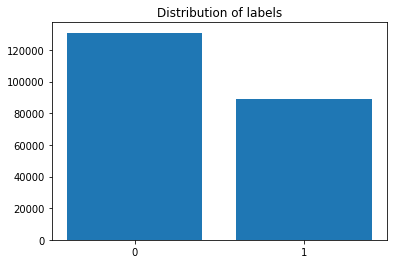

In [21]:
#label counts
plt.bar(x=['0','1'], height=label_df['label'].value_counts())
plt.title('Distribution of labels')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(label_df['id'], label_df['label'], test_size=0.2, random_state=42)